In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data1=pd.read_csv('car_data.csv')
data2=pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO (1).csv')
data3=pd.read_csv('Car_details_v3.csv')

In [7]:
import pandas as pd

# 重新加载 CSV 文件
data1 = pd.read_csv("car_data.csv")
data2 = pd.read_csv("CAR_DETAILS_FROM_CAR_DEKHO (1).csv")
data3 = pd.read_csv("car_details_v3.csv")

# 统一列名
common_columns = set(data1.columns) | set(data2.columns) | set(data3.columns)

# 重新索引，确保所有 DataFrame 具有相同的列，缺失值填充 NaN
data1 = data1.reindex(columns=common_columns)
data2 = data2.reindex(columns=common_columns)
data3 = data3.reindex(columns=common_columns)

# 合并数据
data_all = pd.concat([data1, data2, data3], ignore_index=True)

# 查看结果
print(data_all.info())  # 确认所有列的非空情况
print(data_all.head())  # 查看前几行数据


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           11875 non-null  object 
 1   year           11875 non-null  int64  
 2   selling_price  11875 non-null  float64
 3   seats          7360 non-null   float64
 4   owner          11875 non-null  object 
 5   transmission   11875 non-null  object 
 6   torque         7359 non-null   object 
 7   Present_Price  280 non-null    float64
 8   km_driven      11875 non-null  int64  
 9   seller_type    11875 non-null  object 
 10  mileage        7360 non-null   object 
 11  engine         7360 non-null   object 
 12  max_power      7363 non-null   object 
 13  fuel           11875 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.3+ MB
None
      name  year  selling_price  seats owner transmission torque  \
0     ritz  2014           3.35    NaN     0       M

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_all['name_encoded'] = label_encoder.fit_transform(data_all['name'])
print(data_all[['name','name_encoded']].head())
data_all.to_csv('encoded_data.csv',index=False)

      name  name_encoded
0     ritz          2540
1      sx4          2543
2     ciaz          2519
3  wagon r          2546
4    swift          2542


In [9]:
from sklearn.preprocessing import LabelEncoder

# 对 seller_type 列进行编码
label_encoder_seller = LabelEncoder()
data_all['seller_type_encoded'] = label_encoder_seller.fit_transform(data_all['seller_type'])

# 检查编码后的数据
print(data_all[['seller_type', 'seller_type_encoded']].head())

  seller_type  seller_type_encoded
0      Dealer                    0
1      Dealer                    0
2      Dealer                    0
3      Dealer                    0
4      Dealer                    0


In [10]:
# 对 transmission 列进行编码
label_encoder_transmission = LabelEncoder()
data_all['transmission_encoded'] = label_encoder_transmission.fit_transform(data_all['transmission'])

# 检查编码后的数据
print(data_all[['transmission', 'transmission_encoded']].head())

  transmission  transmission_encoded
0       Manual                     1
1       Manual                     1
2       Manual                     1
3       Manual                     1
4       Manual                     1


In [11]:
# 对 fuel 列进行编码
label_encoder_fuel = LabelEncoder()
data_all['fuel_encoded'] = label_encoder_fuel.fit_transform(data_all['fuel'])

# 检查编码后的数据
print(data_all[['fuel', 'fuel_encoded']].head())


     fuel  fuel_encoded
0  Petrol             4
1  Diesel             1
2  Petrol             4
3  Petrol             4
4  Diesel             1


In [12]:
# 定义映射字典
owner_mapping = {
    'first owner': 0,  # 第一任主人
    '0': 0,  # 也考虑0为第一任主人
    'Second Owner': 1,  # 第二任主人
    '1': 1,  # 如果有1表示第二任主人
    'Third Owner': 2,  # 第三任主人
    '2': 2,  # 如果有2表示第三任主人
    'Fourth & Above Owner': 3,  # 第四任及以上主人
    '3': 3  # 如果有3表示第四任及以上主人
}

# 替换 owner 列的值
data_all['owner'] = data_all['owner'].replace(owner_mapping)

# 打印检查结果
print(data_all[['owner']].head())

  owner
0     0
1     0
2     0
3     0
4     0


In [13]:
data_all['mileage'] = data_all['mileage'].str.extract('(\d+\.?\d*)').astype(float)
data_all['engine'] = data_all['engine'].str.extract('(\d+\.?\d*)').astype(float)
data_all['max_power'] = data_all['max_power'].str.extract('(\d+\.?\d*)').astype(float)
data_all['torque'] = data_all['torque'].str.extract('(\d+\.?\d*)').astype(float)

data_all['engine'] = data_all.groupby('name')['engine'].transform(lambda x: x.fillna(x.median()))
data_all['mileage'] = data_all.groupby('name')['mileage'].transform(lambda x: x.fillna(x.median()))
data_all['max_power'] = data_all.groupby('name')['max_power'].transform(lambda x: x.fillna(x.median()))
data_all['torque'] = data_all.groupby('name')['torque'].transform(lambda x: x.fillna(x.median()))
data_all['seats'] = data_all.groupby('name')['seats'].transform(lambda x: x.fillna(x.median()))




In [14]:
# 保存编码后的数据
data_all.to_csv('encoded_data.csv', index=False)

In [15]:
print(data_all.shape)  # 打印数据的形状
data_all.info()  # 打印详细信息

(11875, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11875 non-null  object 
 1   year                  11875 non-null  int64  
 2   selling_price         11875 non-null  float64
 3   seats                 10679 non-null  float64
 4   owner                 11875 non-null  object 
 5   transmission          11875 non-null  object 
 6   torque                10677 non-null  float64
 7   Present_Price         280 non-null    float64
 8   km_driven             11875 non-null  int64  
 9   seller_type           11875 non-null  object 
 10  mileage               10679 non-null  float64
 11  engine                10679 non-null  float64
 12  max_power             10677 non-null  float64
 13  fuel                  11875 non-null  object 
 14  name_encoded          11875 non-null  int64  
 15  seller_

In [16]:
# 对合并后的数据执行描述性统计
print(data_all.describe(include="all"))


                          name          year  selling_price         seats  \
count                    11875  11875.000000   1.187500e+04  10679.000000   
unique                    2548           NaN            NaN           NaN   
top     Maruti Swift Dzire VDI           NaN            NaN           NaN   
freq                       180           NaN            NaN           NaN   
mean                       NaN   2013.558232   5.755610e+05      5.398258   
std                        NaN      4.101566   7.258874e+05      0.940604   
min                        NaN   1983.000000   1.000000e-01      2.000000   
25%                        NaN   2011.000000   2.250000e+05      5.000000   
50%                        NaN   2014.000000   4.000000e+05      5.000000   
75%                        NaN   2017.000000   6.500000e+05      5.000000   
max                        NaN   2020.000000   1.000000e+07     14.000000   

              owner transmission        torque  Present_Price     km_driven

In [17]:
data_all.describe(include="all")


,name,year,selling_price,seats,owner,transmission,torque,Present_Price,km_driven,seller_type,mileage,engine,max_power,fuel,name_encoded,seller_type_encoded,transmission_encoded,fuel_encoded
count,11875,11875.000000,1.187500e+04,10679.000000,11875,11875,10677.000000,280.000000,1.187500e+04,11875,10679.000000,10679.000000,10677.000000,11875,11875.000000,11875.000000,11875.000000,11875.000000
unique,2548,NaN,NaN,NaN,6,2,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,First Owner,Manual,NaN,NaN,NaN,Individual,NaN,NaN,NaN,Diesel,NaN,NaN,NaN,NaN
freq,180,NaN,NaN,NaN,7542,10439,NaN,NaN,NaN,9413,NaN,NaN,NaN,6158,NaN,NaN,NaN,NaN
mean,NaN,2013.558232,5.755610e+05,5.398258,NaN,NaN,165.068630,7.470929,6.779149e+04,NaN,19.490420,1434.648282,89.838813,NaN,1306.463916,0.845221,0.879074,2.409095
std,NaN,4.101566,7.258874e+05,0.940604,NaN,NaN,94.936707,7.296562,5.351635e+04,NaN,4.017551,496.678550,34.430881,NaN,673.464132,0.428235,0.326055,1.504208
min,NaN,1983.000000,1.000000e-01,2.000000,NaN,NaN,4.800000,0.320000,1.000000e+00,NaN,0.000000,624.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,2011.000000,2.250000e+05,5.000000,NaN,NaN,99.000000,1.050000,3.400000e+04,NaN,16.800000,1197.000000,68.000000,NaN,756.000000,1.000000,1.000000,1.000000
50%,NaN,2014.000000,4.000000e+05,5.000000,NaN,NaN,151.000000,6.445000,6.000000e+04,NaN,19.400000,1248.000000,81.860000,NaN,1354.000000,1.000000,1.000000,1.000000
75%,NaN,2017.000000,6.500000e+05,5.000000,NaN,NaN,200.000000,9.910000,9.000000e+04,NaN,22.370000,1498.000000,100.600000,NaN,1752.000000,1.000000,1.000000,4.000000


In [18]:
# 将列名中的空格和连字符替换为下划线
data_all.columns = data_all.columns.map(lambda x: x.replace(" ", "_").replace("-", "_"))


In [19]:
# 获取所有列的统计描述
data_all.describe(include="all")


,name,year,selling_price,seats,owner,transmission,torque,Present_Price,km_driven,seller_type,mileage,engine,max_power,fuel,name_encoded,seller_type_encoded,transmission_encoded,fuel_encoded
count,11875,11875.000000,1.187500e+04,10679.000000,11875,11875,10677.000000,280.000000,1.187500e+04,11875,10679.000000,10679.000000,10677.000000,11875,11875.000000,11875.000000,11875.000000,11875.000000
unique,2548,NaN,NaN,NaN,6,2,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,First Owner,Manual,NaN,NaN,NaN,Individual,NaN,NaN,NaN,Diesel,NaN,NaN,NaN,NaN
freq,180,NaN,NaN,NaN,7542,10439,NaN,NaN,NaN,9413,NaN,NaN,NaN,6158,NaN,NaN,NaN,NaN
mean,NaN,2013.558232,5.755610e+05,5.398258,NaN,NaN,165.068630,7.470929,6.779149e+04,NaN,19.490420,1434.648282,89.838813,NaN,1306.463916,0.845221,0.879074,2.409095
std,NaN,4.101566,7.258874e+05,0.940604,NaN,NaN,94.936707,7.296562,5.351635e+04,NaN,4.017551,496.678550,34.430881,NaN,673.464132,0.428235,0.326055,1.504208
min,NaN,1983.000000,1.000000e-01,2.000000,NaN,NaN,4.800000,0.320000,1.000000e+00,NaN,0.000000,624.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,2011.000000,2.250000e+05,5.000000,NaN,NaN,99.000000,1.050000,3.400000e+04,NaN,16.800000,1197.000000,68.000000,NaN,756.000000,1.000000,1.000000,1.000000
50%,NaN,2014.000000,4.000000e+05,5.000000,NaN,NaN,151.000000,6.445000,6.000000e+04,NaN,19.400000,1248.000000,81.860000,NaN,1354.000000,1.000000,1.000000,1.000000
75%,NaN,2017.000000,6.500000e+05,5.000000,NaN,NaN,200.000000,9.910000,9.000000e+04,NaN,22.370000,1498.000000,100.600000,NaN,1752.000000,1.000000,1.000000,4.000000


In [20]:
# 显示所有分类变量的描述
print(data_all.describe(include='object'))


                          name        owner transmission seller_type    fuel
count                    11875        11875        11875       11875   11875
unique                    2548            6            2           3       5
top     Maruti Swift Dzire VDI  First Owner       Manual  Individual  Diesel
freq                       180         7542        10439        9413    6158


In [21]:
# 仅显示数值列的统计描述
print(data_all.describe())


               year  selling_price         seats        torque  Present_Price  \
count  11875.000000   1.187500e+04  10679.000000  10677.000000     280.000000   
mean    2013.558232   5.755610e+05      5.398258    165.068630       7.470929   
std        4.101566   7.258874e+05      0.940604     94.936707       7.296562   
min     1983.000000   1.000000e-01      2.000000      4.800000       0.320000   
25%     2011.000000   2.250000e+05      5.000000     99.000000       1.050000   
50%     2014.000000   4.000000e+05      5.000000    151.000000       6.445000   
75%     2017.000000   6.500000e+05      5.000000    200.000000       9.910000   
max     2020.000000   1.000000e+07     14.000000    789.000000      36.230000   

          km_driven       mileage        engine     max_power  name_encoded  \
count  1.187500e+04  10679.000000  10679.000000  10677.000000  11875.000000   
mean   6.779149e+04     19.490420   1434.648282     89.838813   1306.463916   
std    5.351635e+04      4.017551

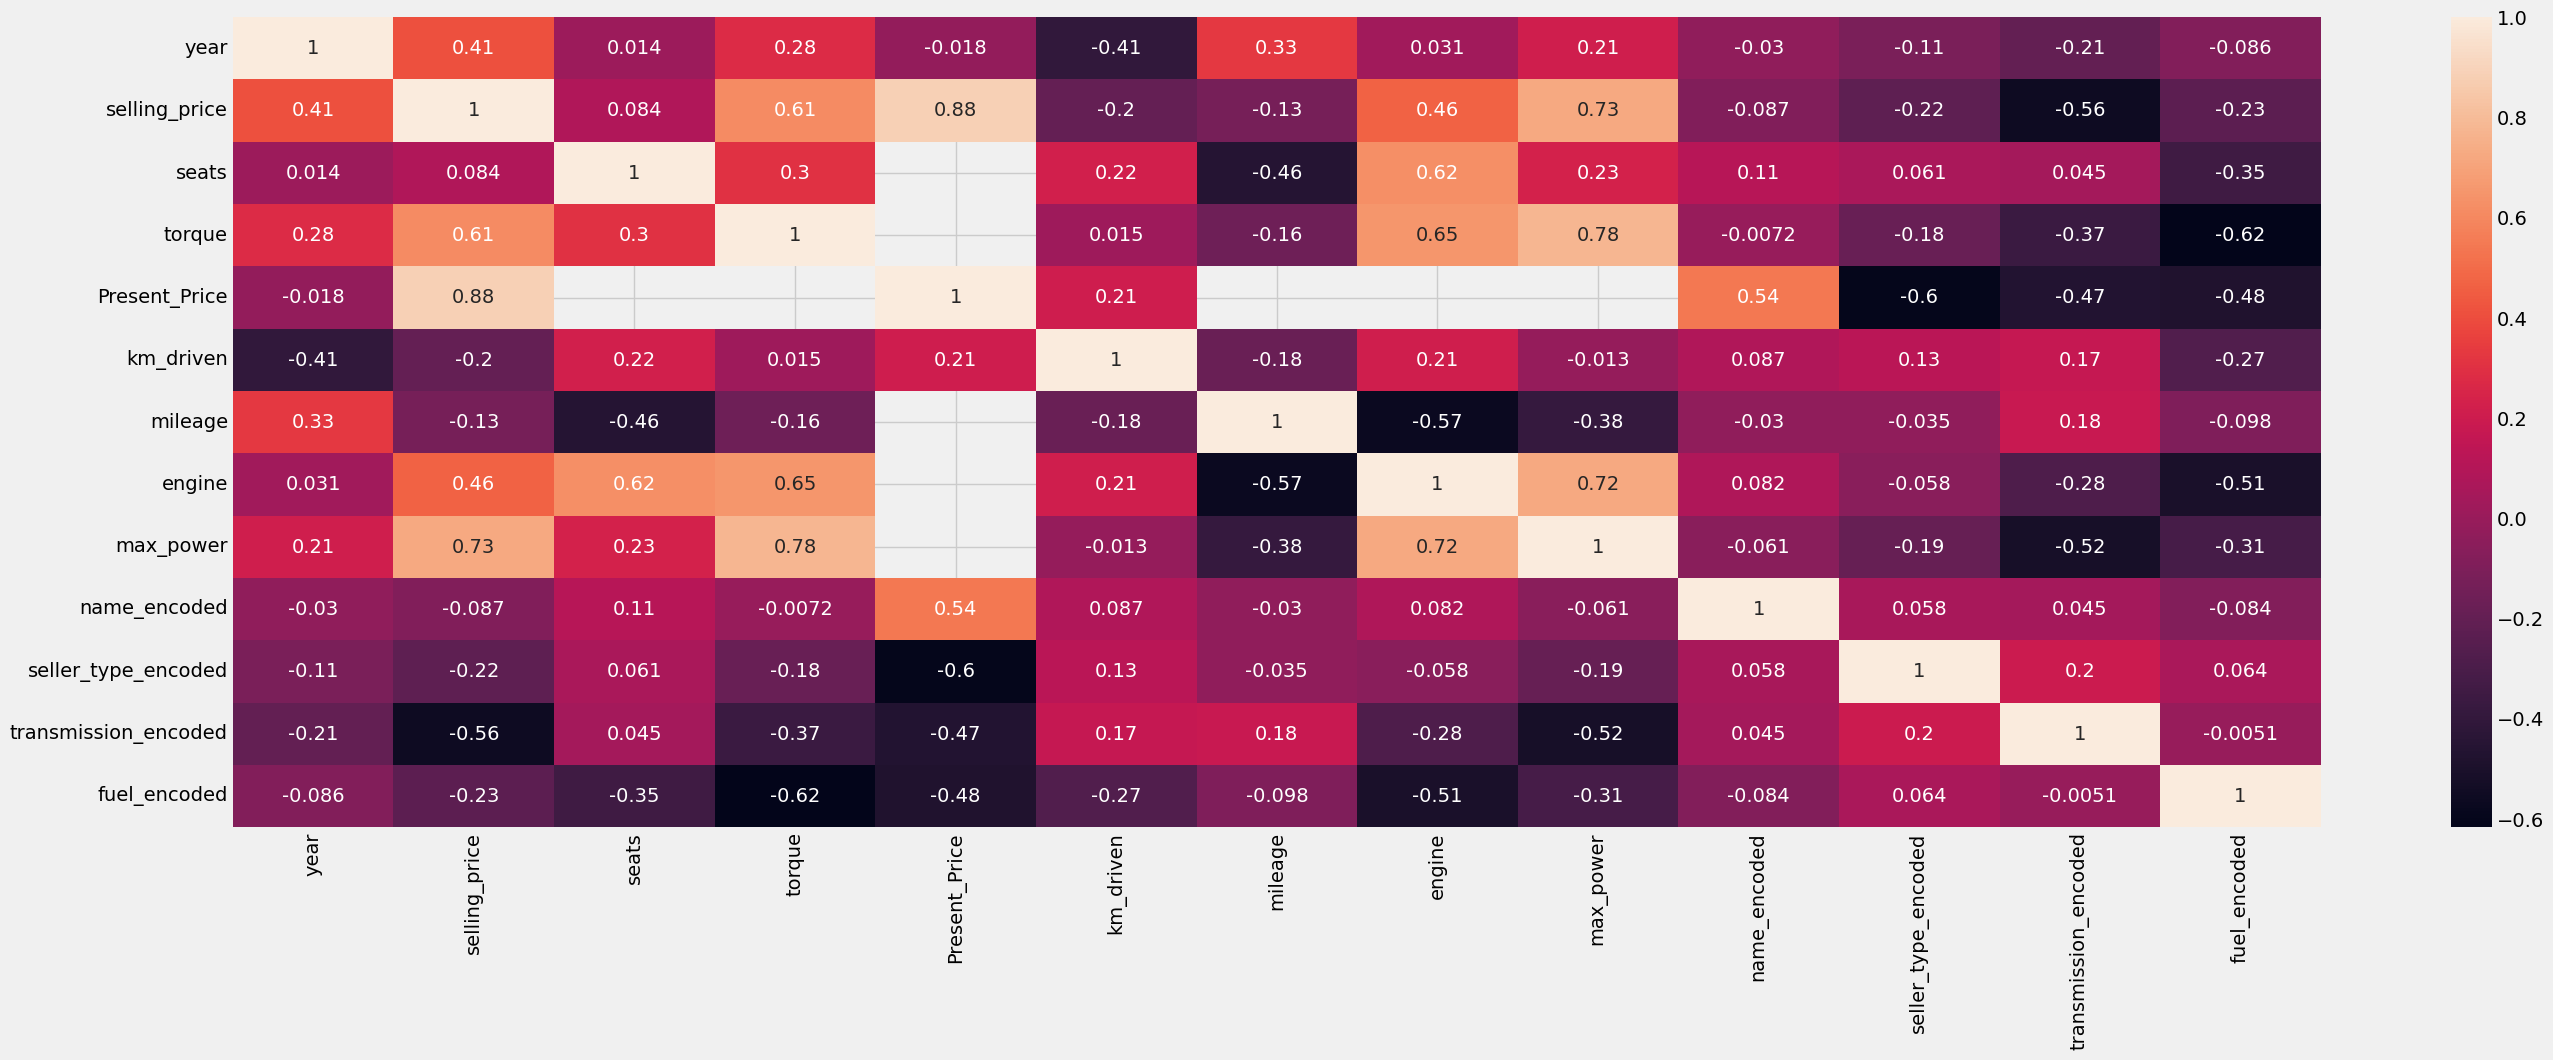

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt

# 选择数值型列
data_numeric = data_all.select_dtypes(include=['float64', 'int64'])

# 计算相关性,
corr = data_numeric.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(30, 10))
sb.heatmap(corr, annot=True, ax=ax)
plt.show()


In [23]:
print(corr["selling_price"].sort_values(ascending=False))


selling_price           1.000000
Present_Price           0.882706
max_power               0.726144
torque                  0.609804
engine                  0.463520
year                    0.406375
seats                   0.084354
name_encoded           -0.086525
mileage                -0.126051
km_driven              -0.195920
seller_type_encoded    -0.223763
fuel_encoded           -0.229260
transmission_encoded   -0.557005
Name: selling_price, dtype: float64


排除了相关性较低的特征：
seats                   0.084354
name_encoded           -0.086525

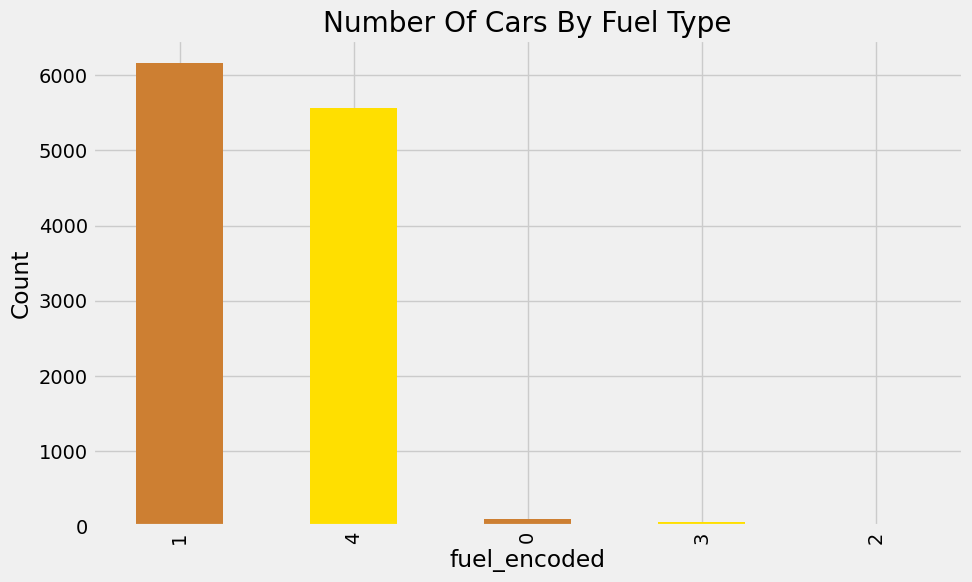

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(10, 6))

# 只显示Fuel_Type列的分布
data_all['fuel_encoded'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00'])
plt.title('Number Of Cars By Fuel Type')
plt.ylabel('Count')

# 显示图表
plt.show()



1-Diesel,4-Petrol,0-CNG,3-LPG,2-Electric(1)

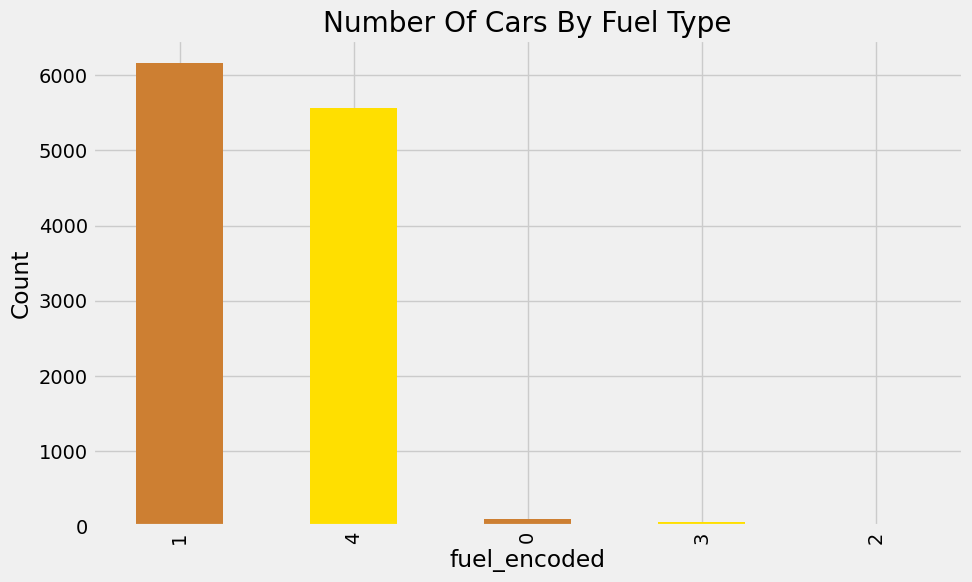

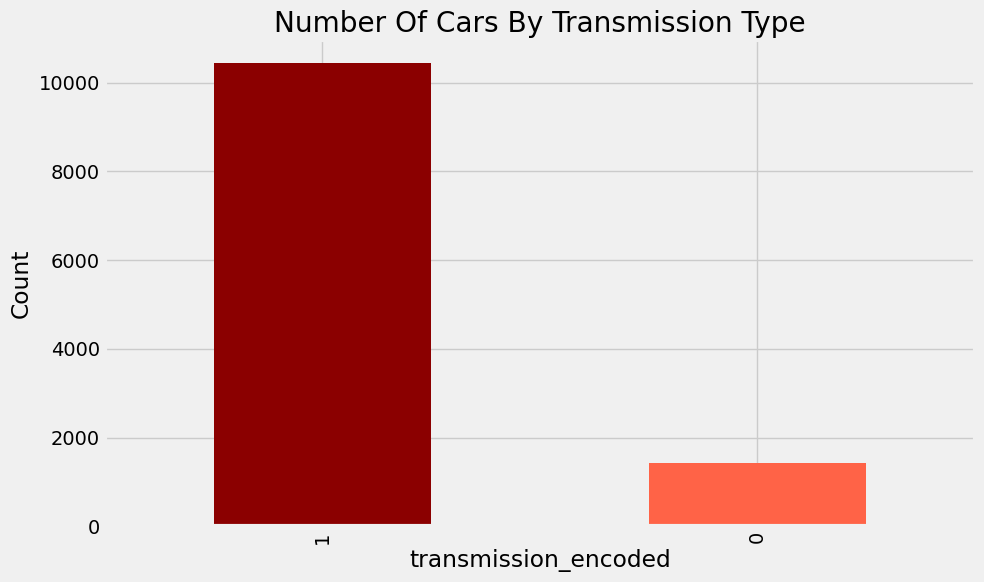

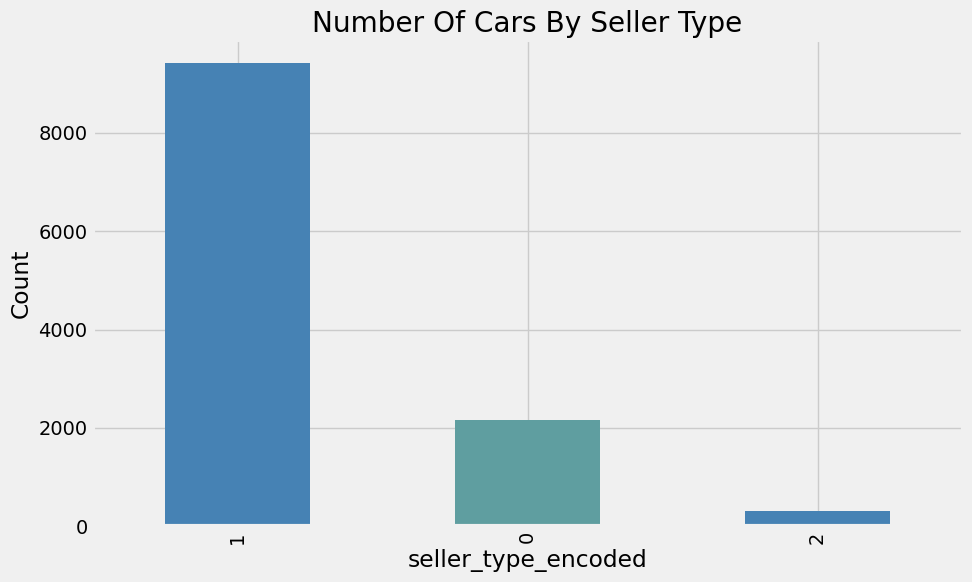

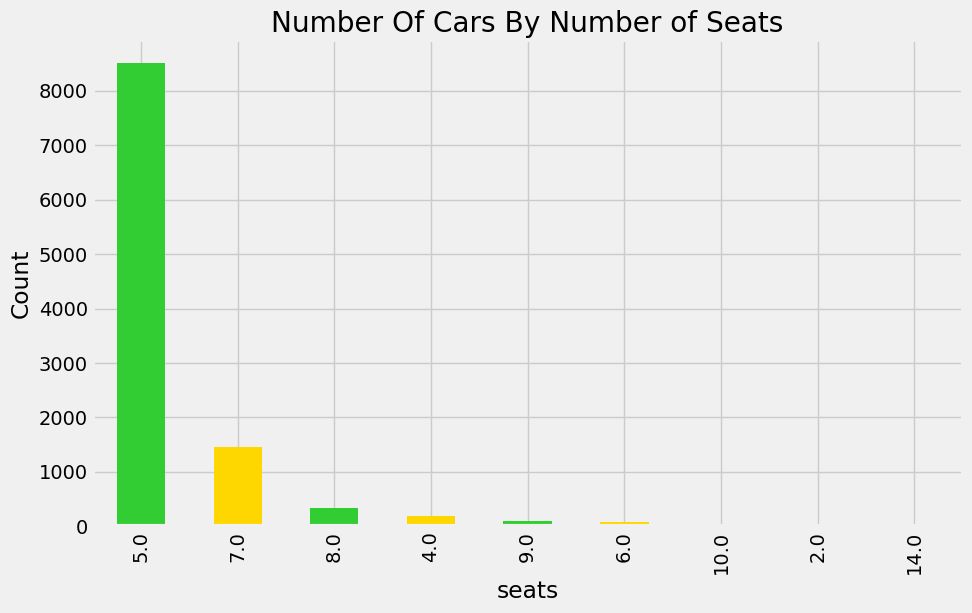

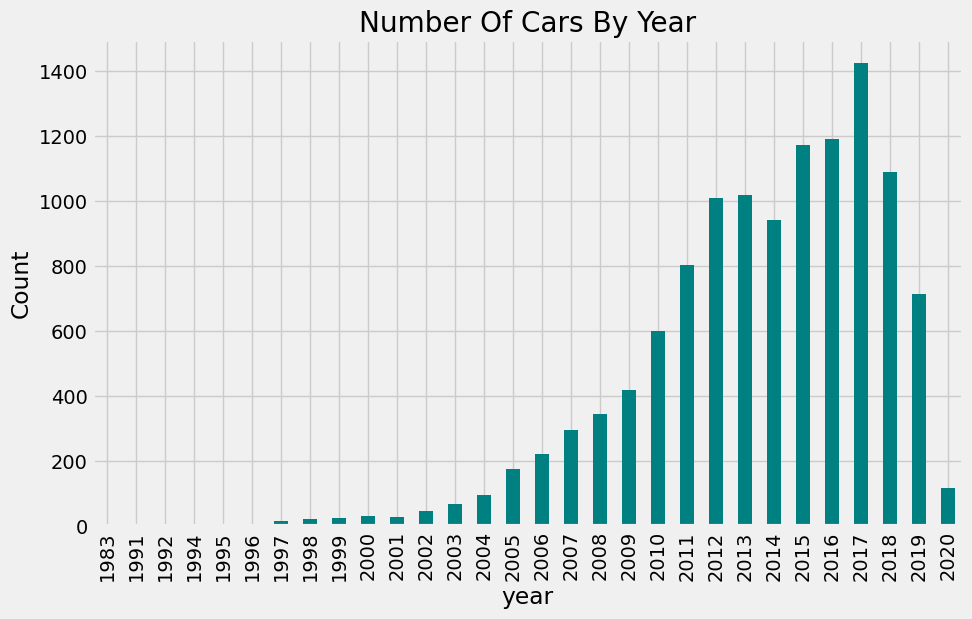

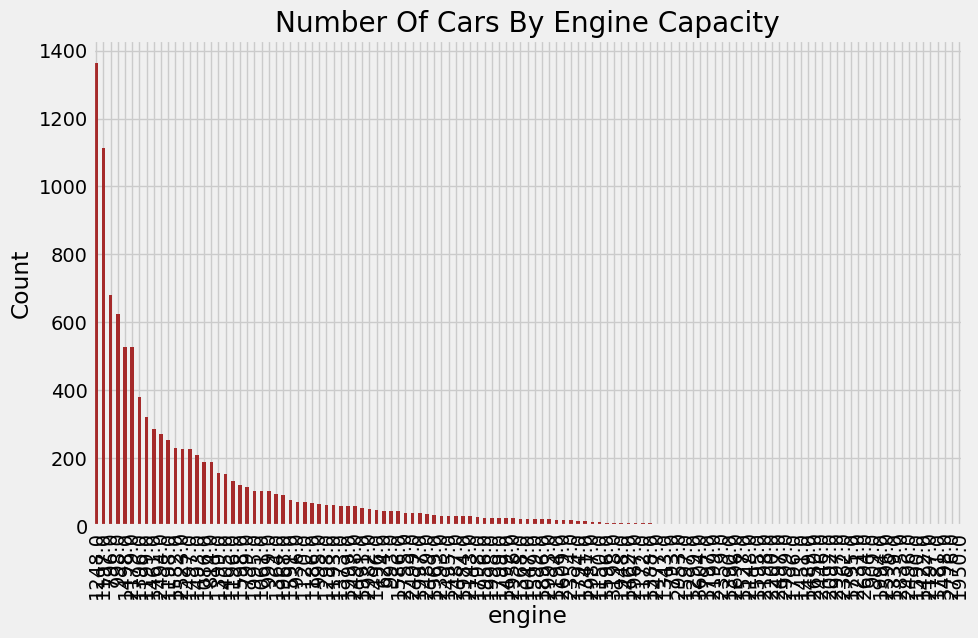

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(10, 6))

# 示例：显示 Fuel Type 列的分布
data_all['fuel_encoded'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00'])
plt.title('Number Of Cars By Fuel Type')
plt.ylabel('Count')
plt.show()

# 示例：显示 Transmission 列的分布
plt.figure(figsize=(10, 6))
data_all['transmission_encoded'].value_counts().plot.bar(color=['#8B0000', '#FF6347'])
plt.title('Number Of Cars By Transmission Type')
plt.ylabel('Count')
plt.show()

# 示例：显示 Seller Type 列的分布
plt.figure(figsize=(10, 6))
data_all['seller_type_encoded'].value_counts().plot.bar(color=['#4682B4', '#5F9EA0'])
plt.title('Number Of Cars By Seller Type')
plt.ylabel('Count')
plt.show()

# 示例：显示 Seats 列的分布
plt.figure(figsize=(10, 6))
data_all['seats'].value_counts().plot.bar(color=['#32CD32', '#FFD700'])
plt.title('Number Of Cars By Number of Seats')
plt.ylabel('Count')
plt.show()

# 示例：显示 Year 列的分布
plt.figure(figsize=(10, 6))
data_all['year'].value_counts().sort_index().plot.bar(color=['#008080'])
plt.title('Number Of Cars By Year')
plt.ylabel('Count')
plt.show()

# 示例：显示 Engine 列的分布
plt.figure(figsize=(10, 6))
data_all['engine'].value_counts().plot.bar(color=['#A52A2A'])
plt.title('Number Of Cars By Engine Capacity')
plt.ylabel('Count')
plt.show()


selling_price           1.000000
Present_Price           0.882706
max_power               0.726144
torque                  0.609804
engine                  0.463520
year                    0.406375
seats                   0.084354
name_encoded           -0.086525
mileage                -0.126051
km_driven              -0.195920
seller_type_encoded    -0.223763
fuel_encoded           -0.229260
transmission_encoded   -0.557005
Name: selling_price, dtype: float64

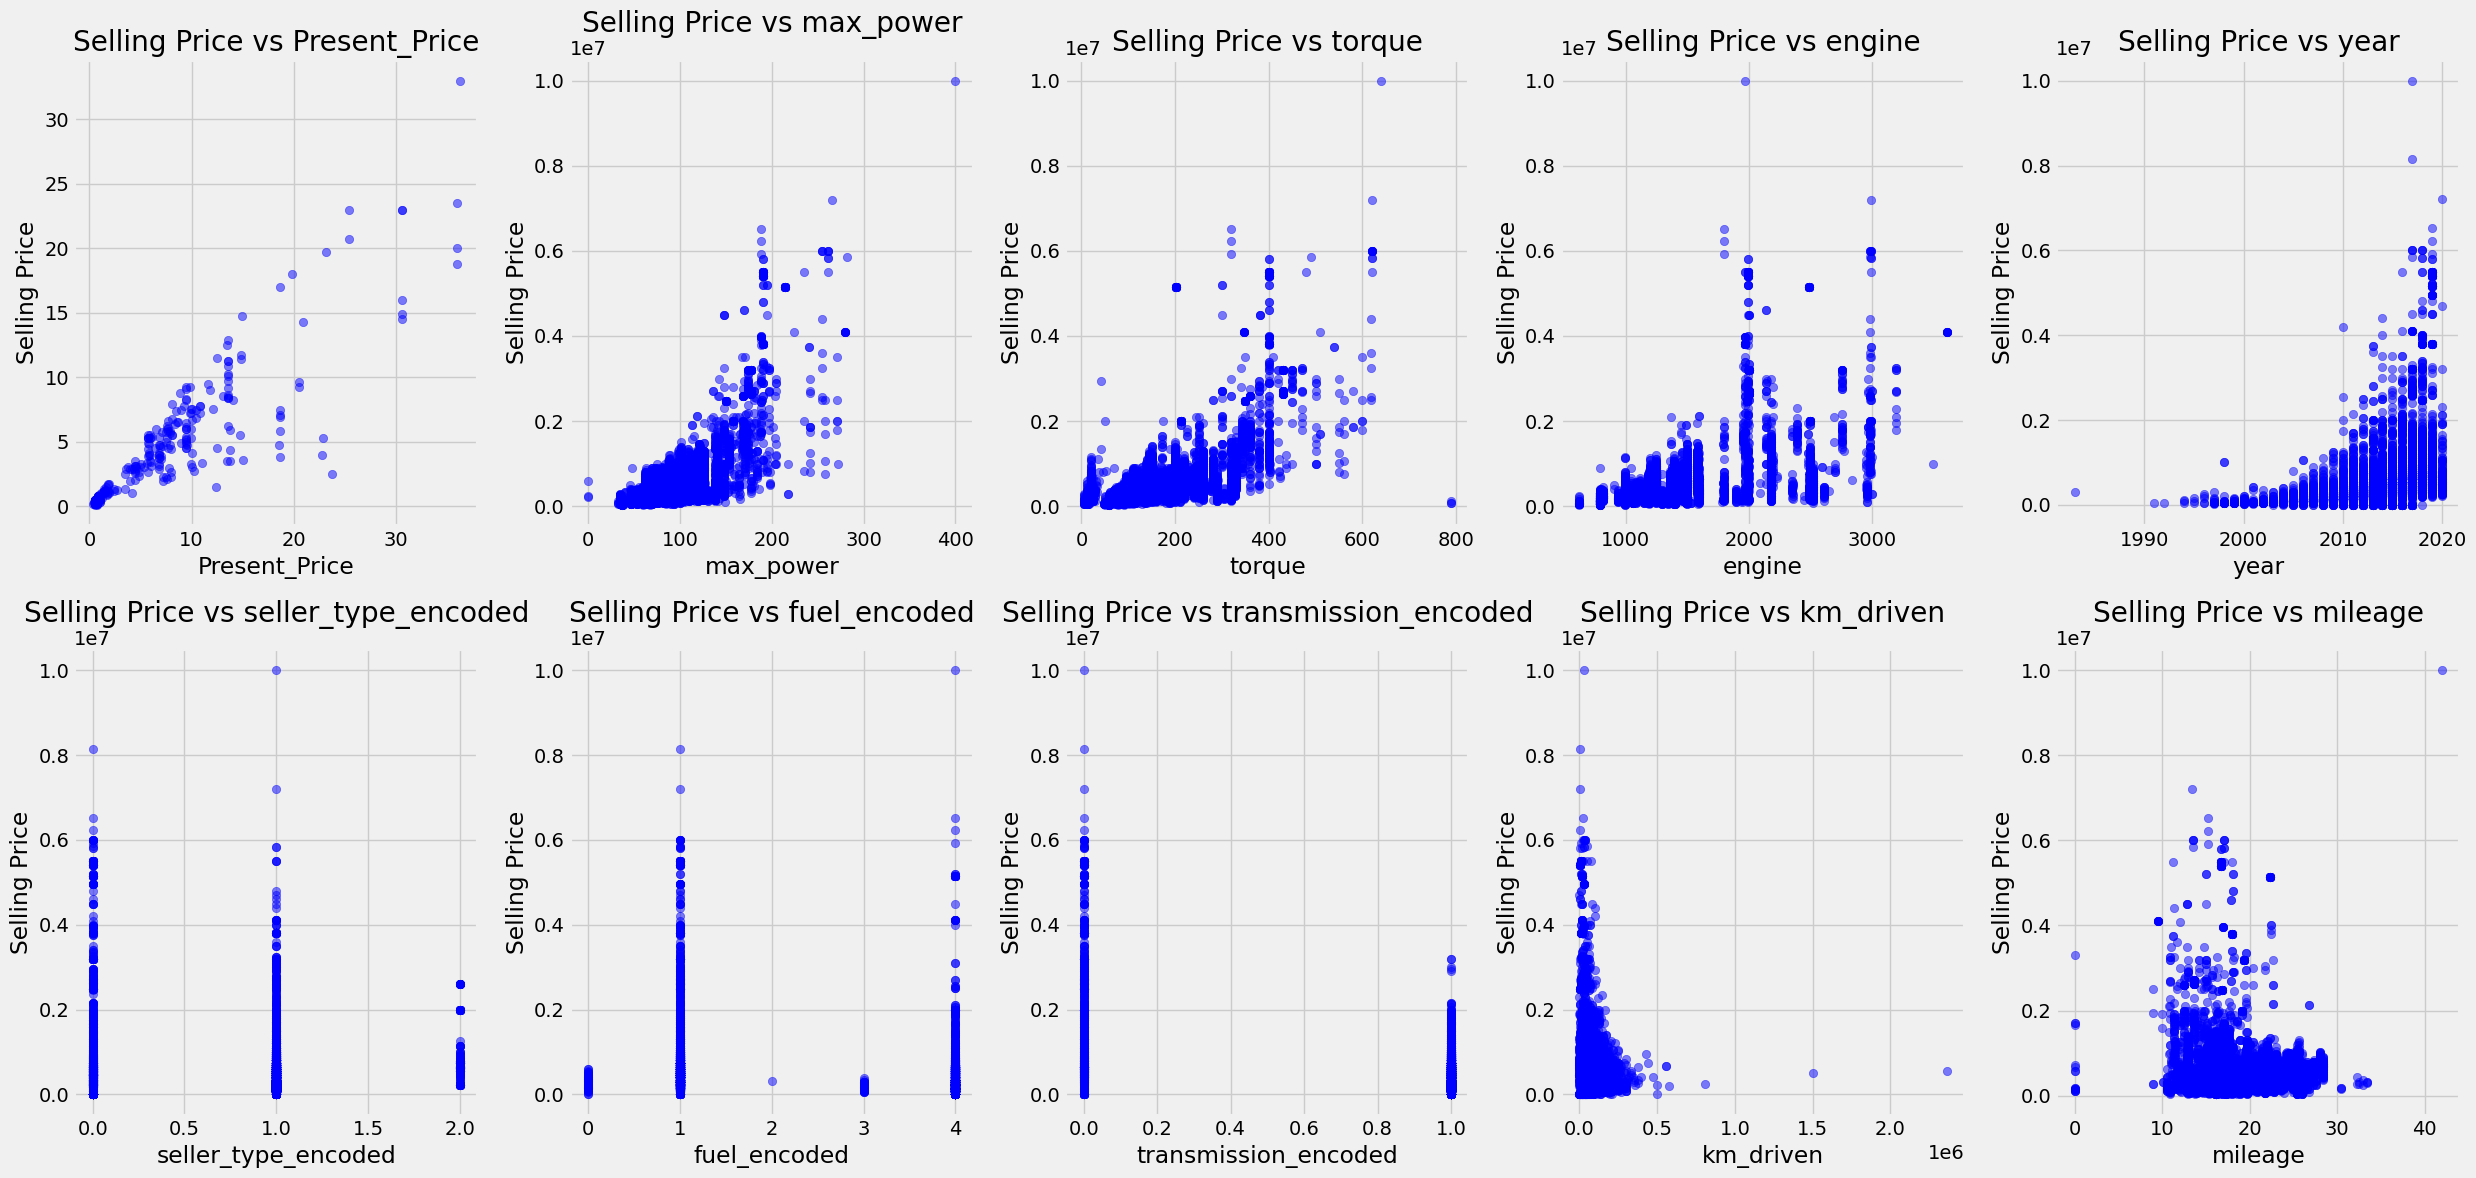

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择相关性绝对值大于0.1的特征
selected_features = ['Present_Price', 'max_power', 'torque', 'engine', 'year', 'seller_type_encoded', 
                     'fuel_encoded', 'transmission_encoded', 'km_driven', 'mileage']

# 创建多个散点图
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

# 绘制散点图
for i, feature in enumerate(selected_features):
    ax = axes[i//5, i%5]  # 确定子图的位置
    ax.scatter(data_all[feature], data_all['selling_price'], color='b', alpha=0.5)
    ax.set_title(f'Selling Price vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Selling Price')

plt.tight_layout()  # 调整布局，避免图像重叠
plt.show()

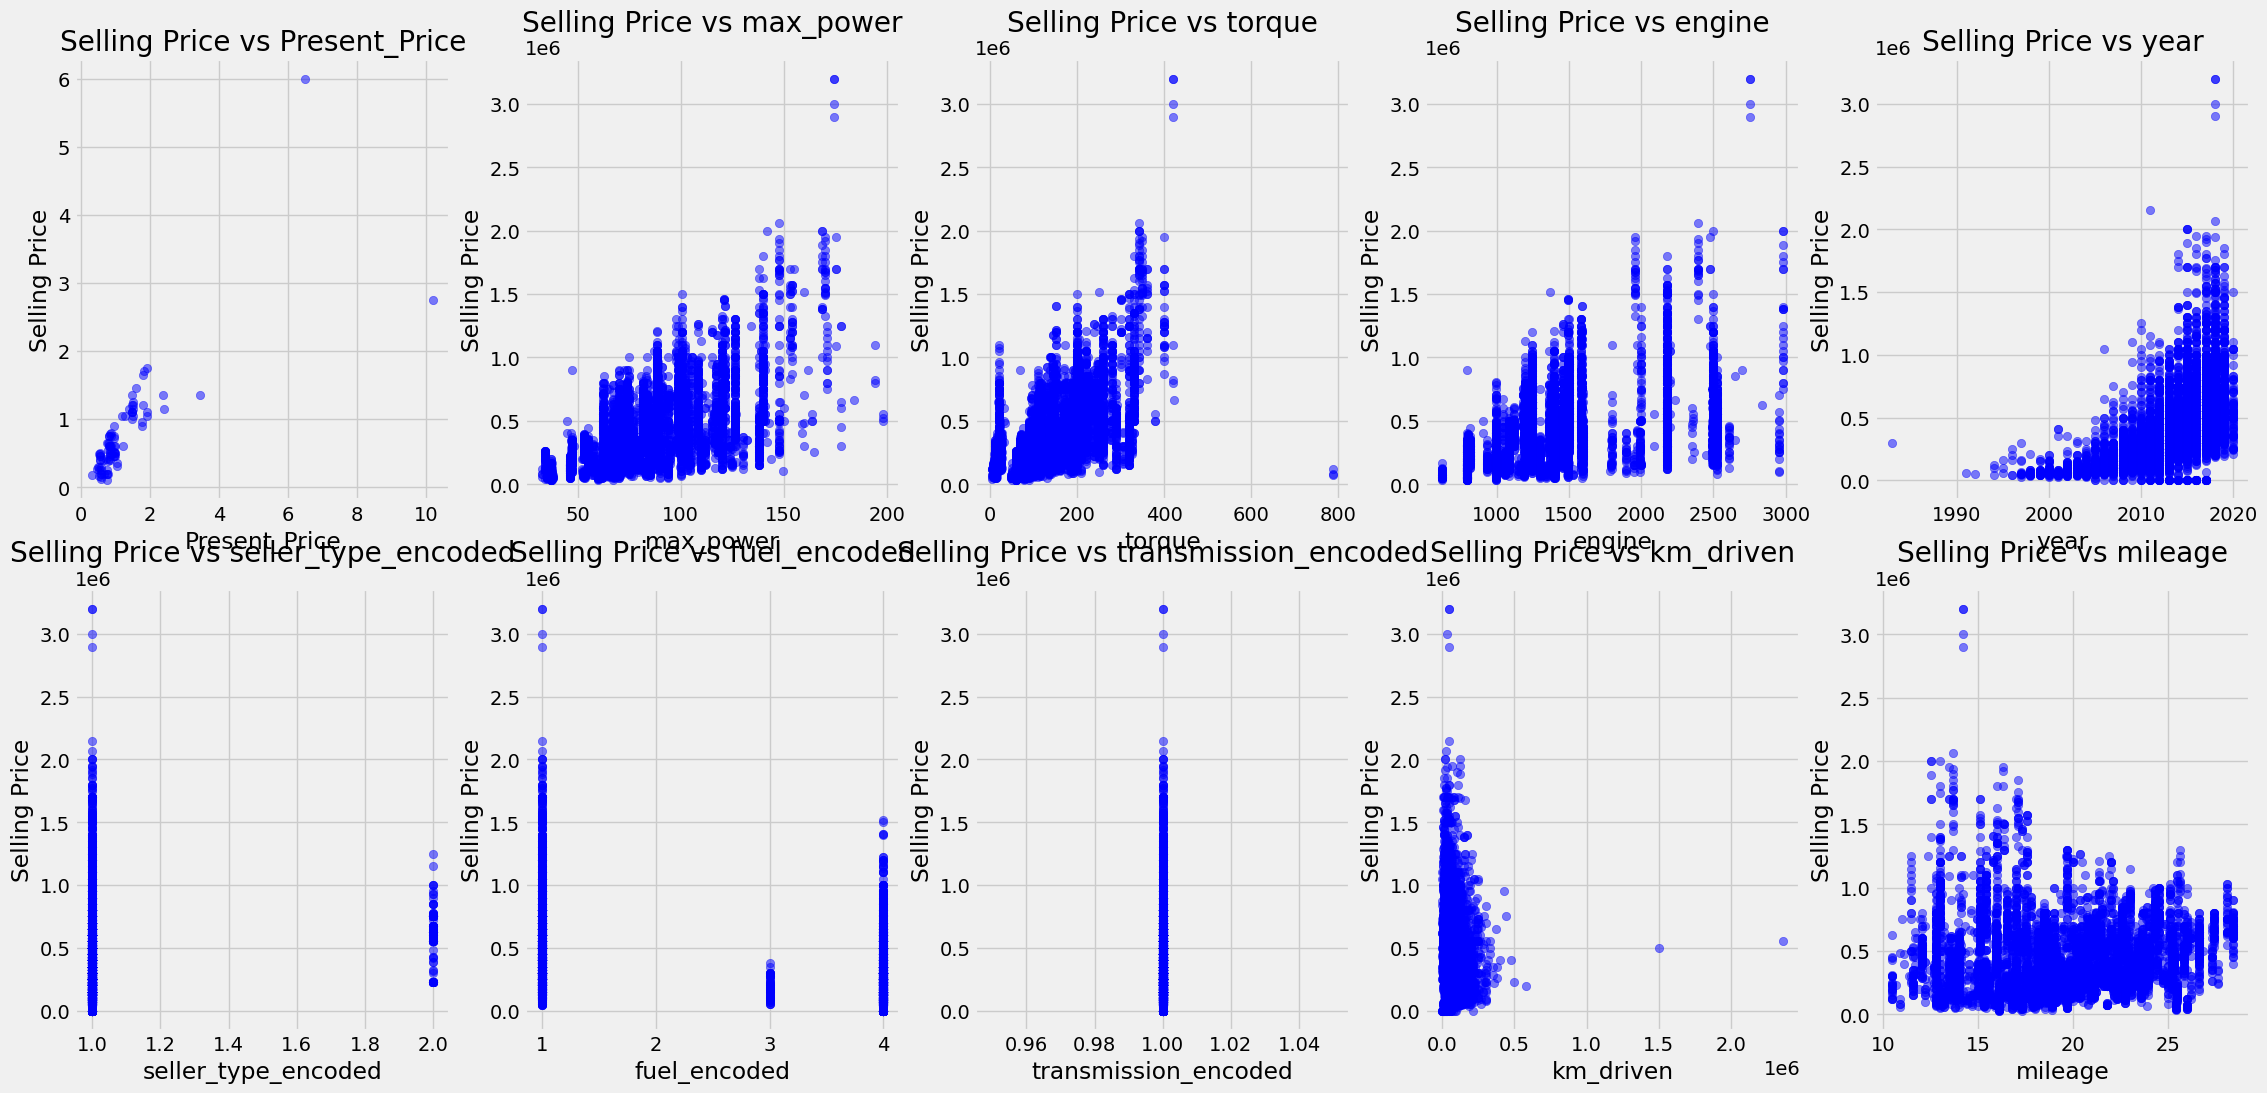

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 读取数据
data_all = pd.read_csv("encoded_data.csv")  # 请根据实际数据路径修改

# 选择相关性绝对值大于0.1的特征
selected_features = ['Present_Price', 'max_power', 'torque', 'engine', 'year', 'seller_type_encoded', 
                     'fuel_encoded', 'transmission_encoded', 'km_driven', 'mileage']

# 去除数据中包含0值的行
data_filtered = data_all[(data_all[selected_features] != 0).all(axis=1) & (data_all['selling_price'] != 0)]

# 创建多个散点图
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

# 绘制散点图
for i, feature in enumerate(selected_features):
    ax = axes[i // 5, i % 5]  # 确定子图的位置
    ax.scatter(data_filtered[feature], data_filtered['selling_price'], color='b', alpha=0.5)
    ax.set_title(f'Selling Price vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Selling Price')


plt.show()


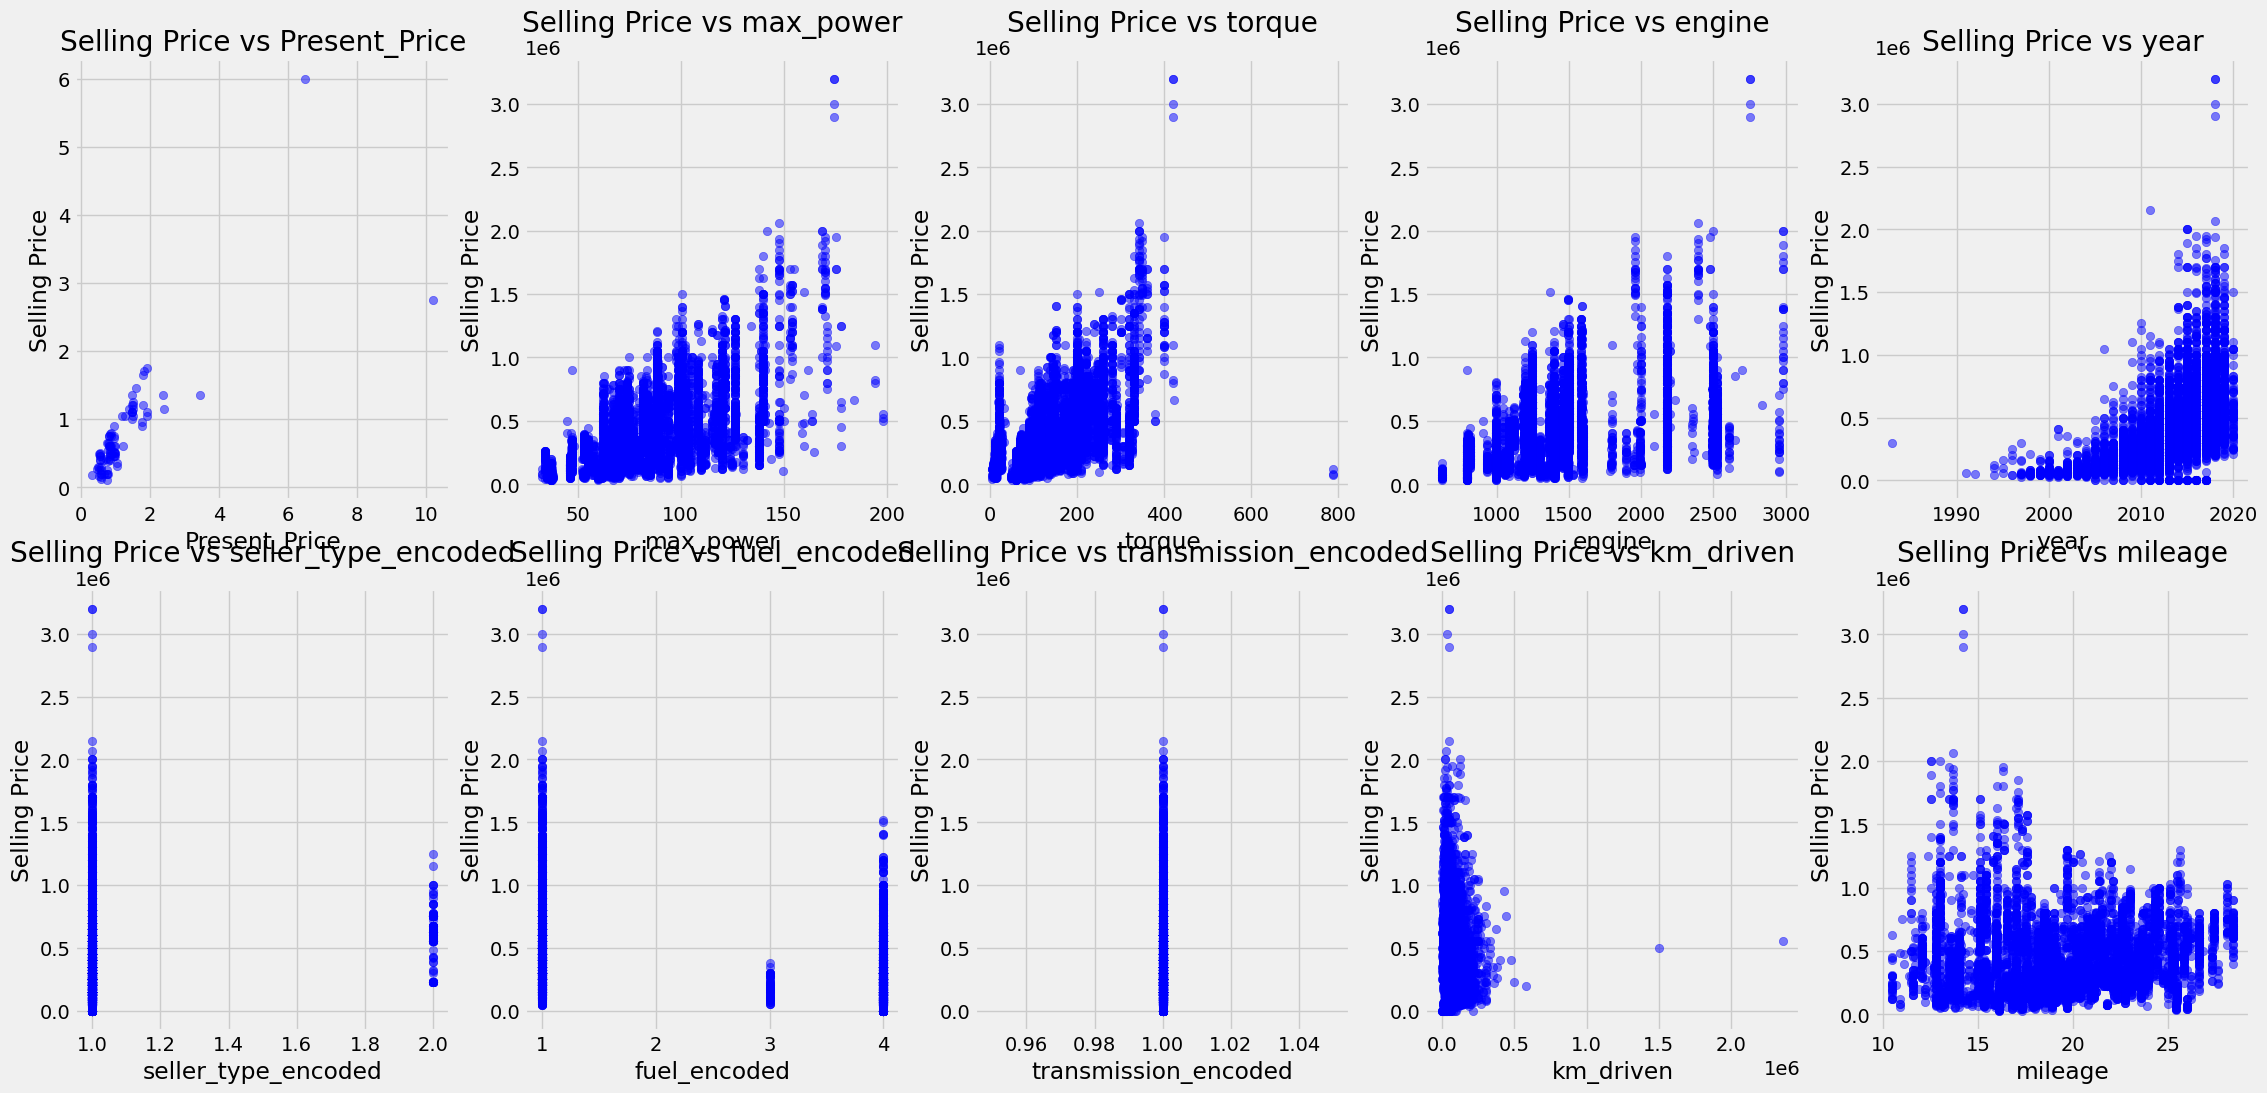

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# 读取数据
data_all = pd.read_csv("encoded_data.csv")  # 请根据实际数据路径修改

# 选择相关性绝对值大于0.1的特征
selected_features = ['Present_Price', 'max_power', 'torque', 'engine', 'year', 'seller_type_encoded', 
                     'fuel_encoded', 'transmission_encoded', 'km_driven', 'mileage']

# 去除数据中包含0值的行
data_filtered = data_all[(data_all[selected_features + ['selling_price']] != 0).all(axis=1)]

# 创建多个散点图
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

# 绘制散点图
for i, feature in enumerate(selected_features):
    ax = axes[i // 5, i % 5]  # 确定子图的位置
    ax.scatter(data_filtered[feature], data_filtered['selling_price'], color='b', alpha=0.5)
    ax.set_title(f'Selling Price vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Selling Price')

plt.show()

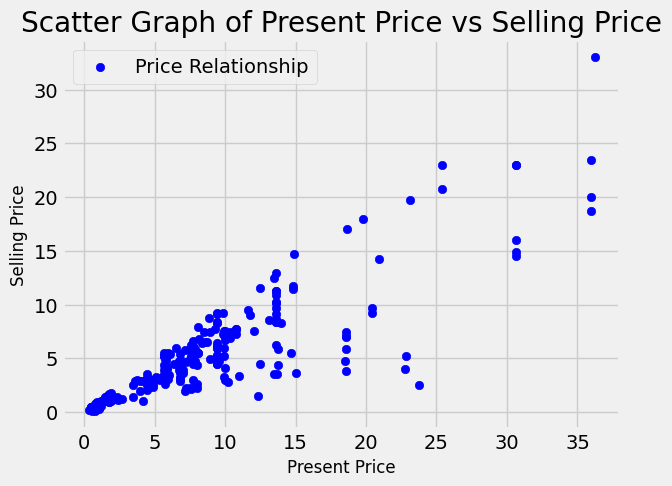

In [29]:
import matplotlib.pyplot as plt

# 假设 data_all是您的数据框，且包含 'Present_Price' 和 'selling_price' 列
plt.scatter(data_all.Present_Price, data_all.selling_price, label='Price Relationship', marker='o', color='b')

# 设置x轴和y轴的标签
plt.xlabel('Present Price', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# 设置图表标题
plt.title('Scatter Graph of Present Price vs Selling Price')

# 显示图例
plt.legend()

# 显示图表
plt.show()

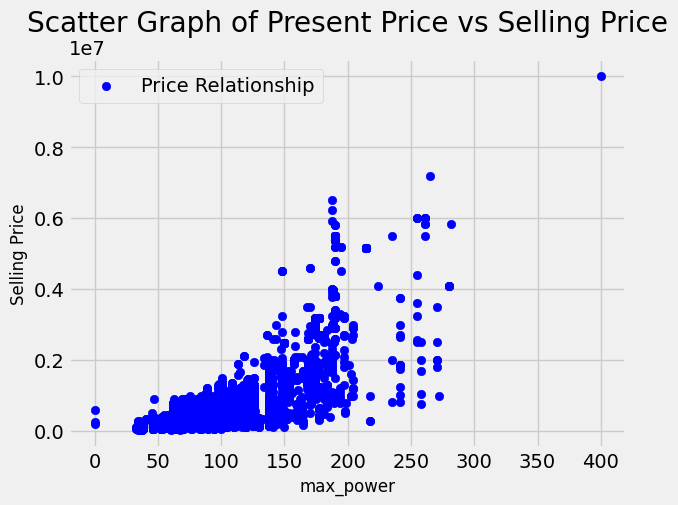

In [30]:
import matplotlib.pyplot as plt

# 假设 data_all是您的数据框，且包含 'Present_Price' 和 'selling_price' 列
plt.scatter(data_all.max_power, data_all.selling_price, label='Price Relationship', marker='o', color='b')
# 去除数据中包含0值的行
data_filtered = data_all[(data_all[selected_features + ['selling_price']] != 0).all(axis=1)]

# 设置x轴和y轴的标签
plt.xlabel('max_power', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# 设置图表标题
plt.title('Scatter Graph of Present Price vs Selling Price')

# 显示图例
plt.legend()

# 显示图表
plt.show()

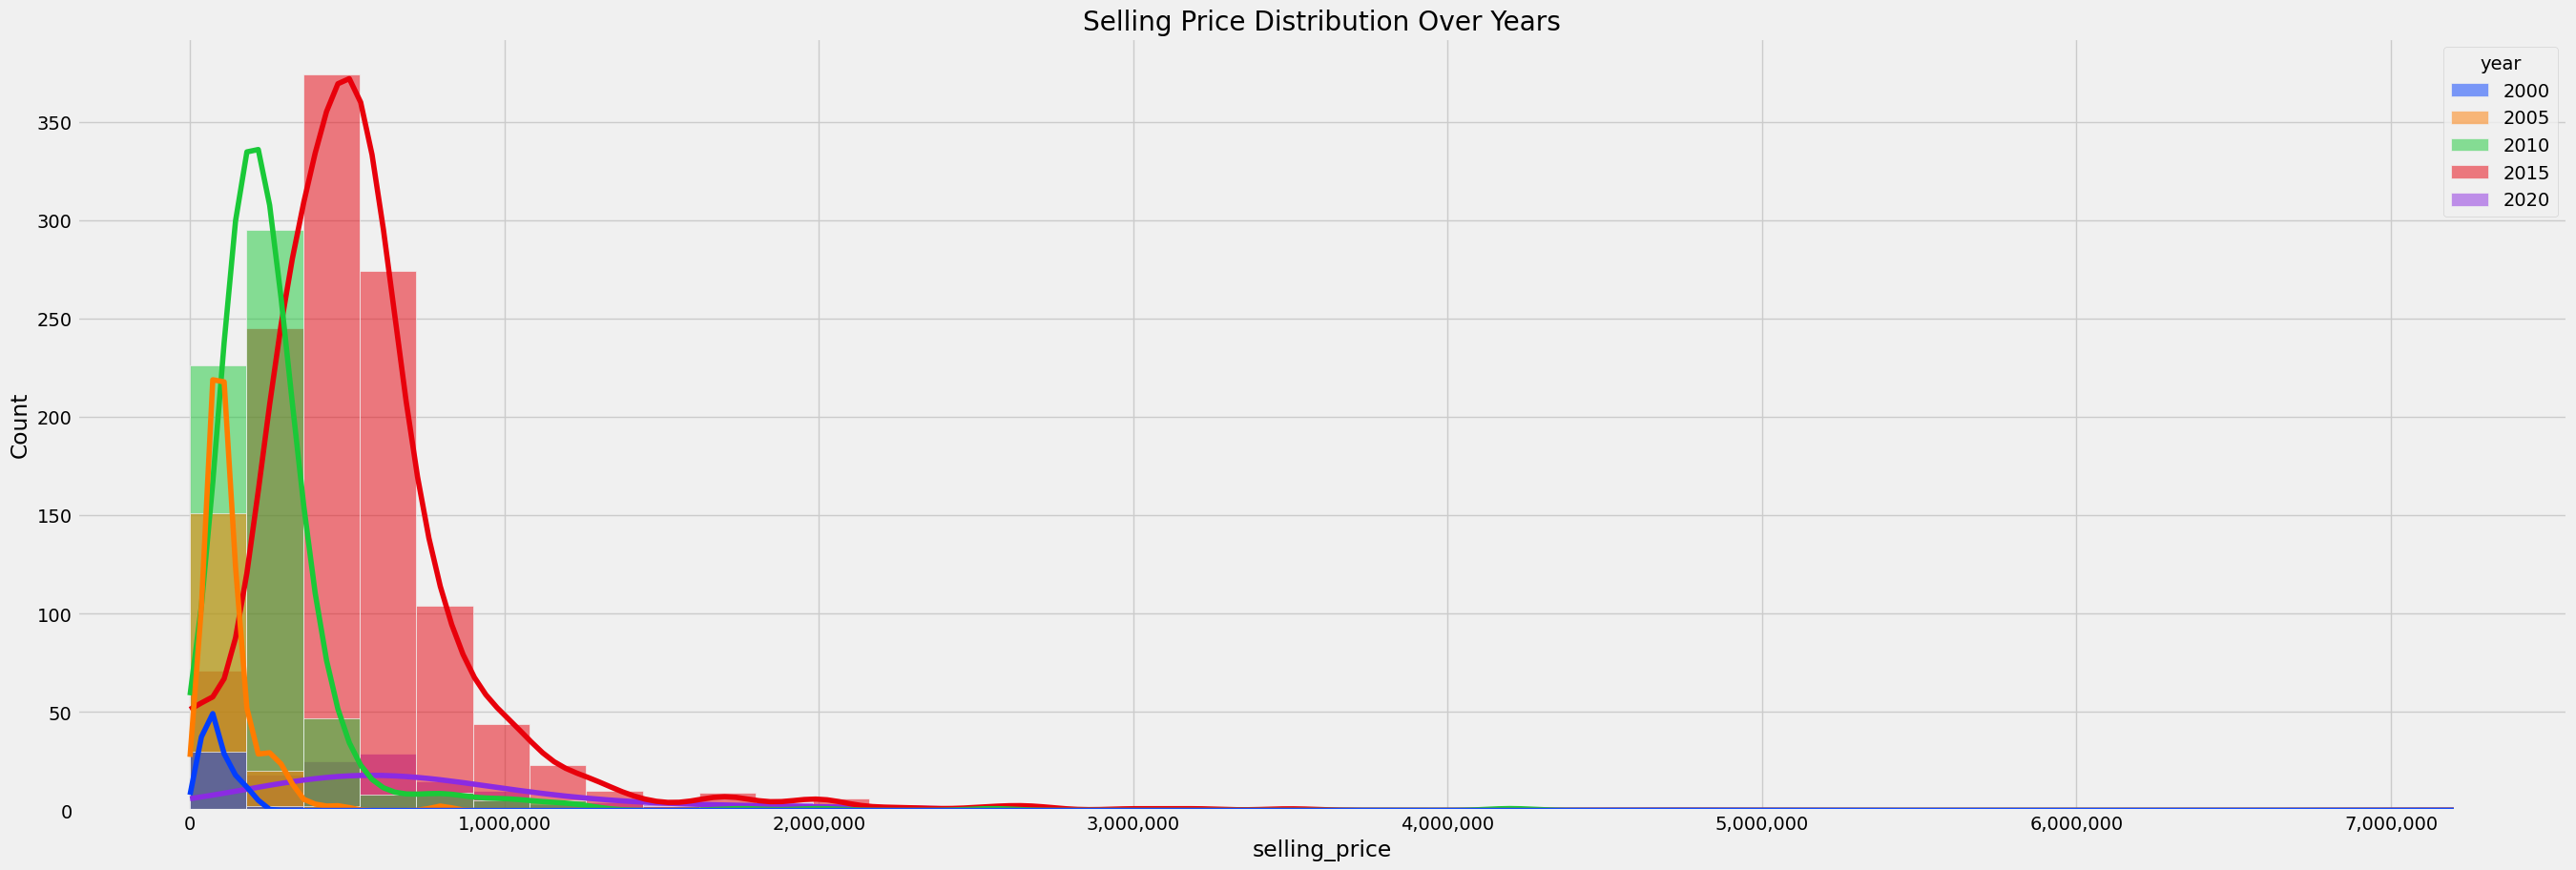

In [31]:
import matplotlib.ticker as mticker

plt.figure(figsize=(30, 10))
sns.histplot(x='selling_price', 
             data=data_all[data_all['year'].isin([2000, 2005, 2010, 2015, 2020])], 
             hue='year', palette='bright', kde=True, bins=40)

# 强制显示完整数值
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Selling Price Distribution Over Years')
plt.show()


jialun


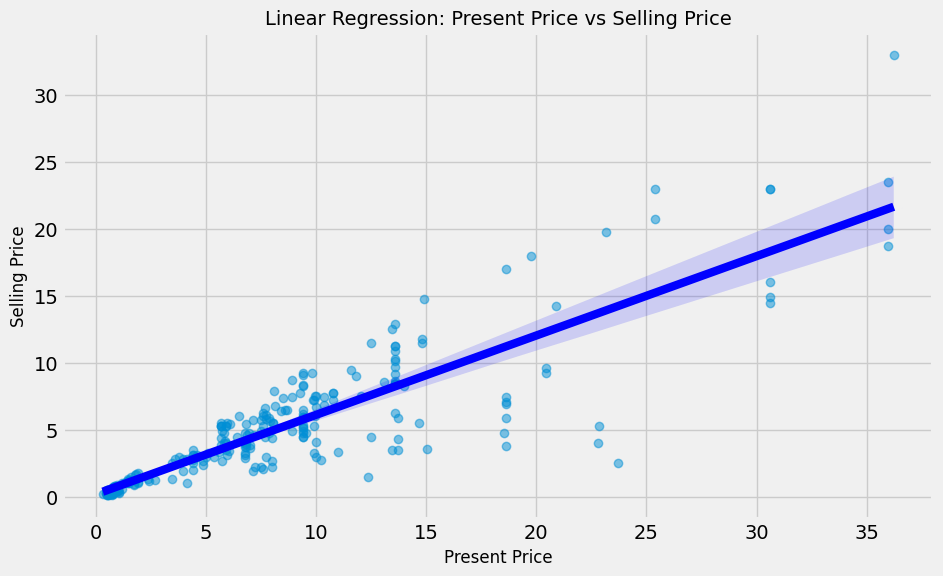

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 data_all 是包含数据的 DataFrame
plt.figure(figsize=(10, 6))

# 绘制散点图，并添加回归拟合直线（红色）
sns.regplot(x='Present_Price', y='selling_price', data=data_all, 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'blue'})

# 设置 x 和 y 轴标签及标题
plt.xlabel("Present Price", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.title("Linear Regression: Present Price vs Selling Price", fontsize=14)

plt.show()


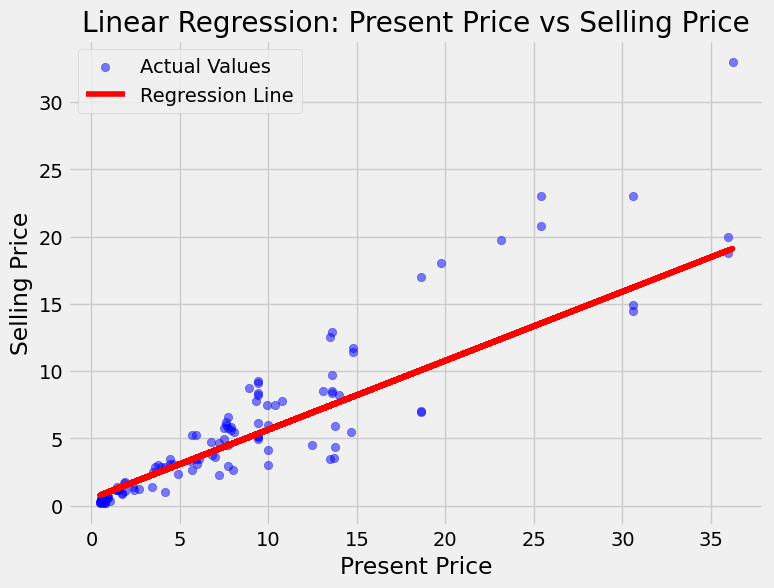

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 选择特征和目标变量
X = data_all[['Present_Price']]  # 只使用 Pr,esent_Price 作为特征
y = data_all['selling_price']  # 目标变量

# 拆分数据集（60% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=42)

# 处理 NaN 数据（删除或填充）
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # 确保 y_train 同步
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 绘制散点图（实际值）
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)

# 绘制回归线（预测值）
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# 添加标题和标签
plt.title('Linear Regression: Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend()

# 显示图形
plt.show()


In [34]:
from sklearn.metrics import r2_score

# 计算 R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7848452645593214


In [35]:
import pandas as pd

# 1. 需要的列名
selected_columns = [
    'Present_Price', 'max_power', 'torque', 'engine', 'year',
    'seller_type_encoded', 'fuel_encoded', 'transmission_encoded',
    'km_driven', 'mileage', 'selling_price'
]

# 2. 读取原始数据
df = pd.read_csv("encoded_data.csv")

# 3. 提取所需列
df_selected = df[selected_columns]



# 5. 保存处理后的数据到新文件
df_selected.to_csv("filtered_data_with_median.csv", index=False)

print("处理完成！已生成 filtered_data_with_median.csv，缺失值已用 0 填充。")


处理完成！已生成 filtered_data_with_median.csv，缺失值已用 0 填充。


selling_price*100000

In [36]:
import pandas as pd

# 1. 读取 CSV 文件（请根据实际文件名或路径进行修改）
df = pd.read_csv("filtered_data_with_median.csv")

# 2. 要用 0 填充缺失值的列
cols_to_fill = ["max_power", "torque", "engine"]

# 3. 用 0 填充缺失值
for col in cols_to_fill:
    df[col].fillna(0, inplace=True)

# 4. 保存处理后的数据到新文件
df.to_csv("filtered_data_with_median2.csv", index=False)

print("处理完成！max_power、torque、engine 列的 NaN 已用 0 覆盖，结果保存为 processed_data.csv。")



处理完成！max_power、torque、engine 列的 NaN 已用 0 覆盖，结果保存为 processed_data.csv。


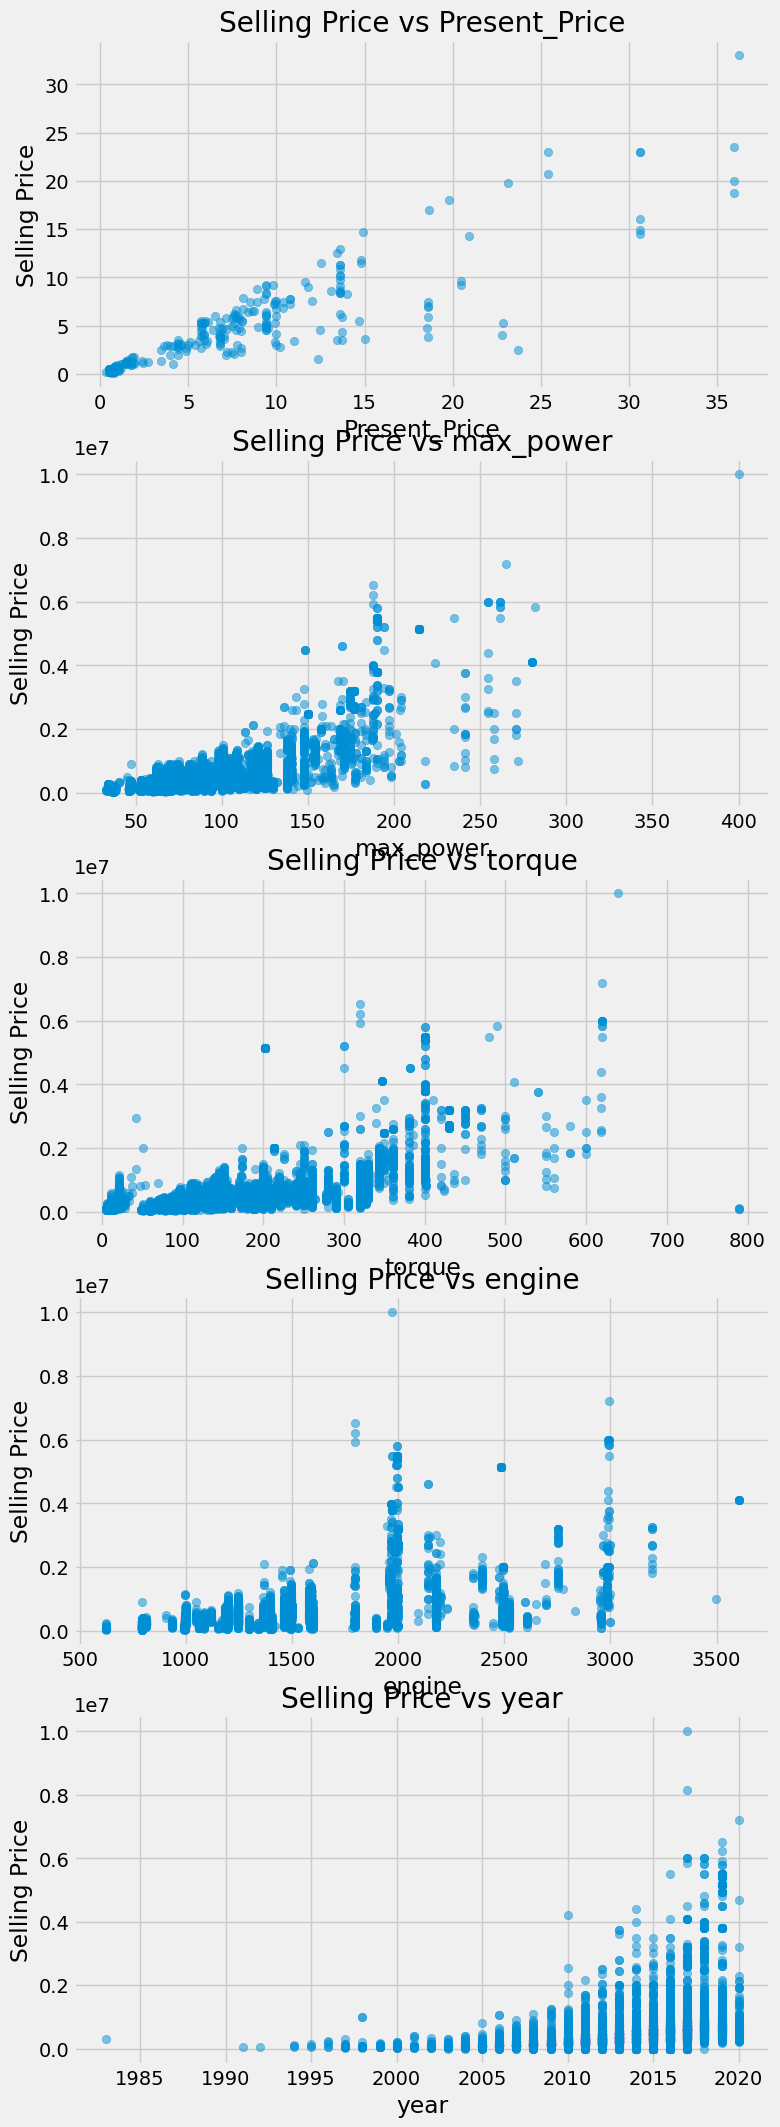

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 读取数据
data_all = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际路径修改

# 2. 选择特征
selected_features = ['Present_Price', 'max_power', 'torque', 'engine', 'year']

# 3. 去除数据中包含0值的行
data_filtered = data_all[(data_all[selected_features + ['selling_price']] != 0).all(axis=1)]

# 4. 创建 5 行 × 1 列 的子图
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# 5. 绘制散点图 + 网格线
for i, feature in enumerate(selected_features):
    ax = axes[i]
    ax.scatter(data_filtered[feature], data_filtered['selling_price'], alpha=0.5)
    ax.set_title(f'Selling Price vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Selling Price')
    
    # 显示网格线
    ax.grid(True)  # or: ax.grid(which='both', alpha=0.5)


plt.show()



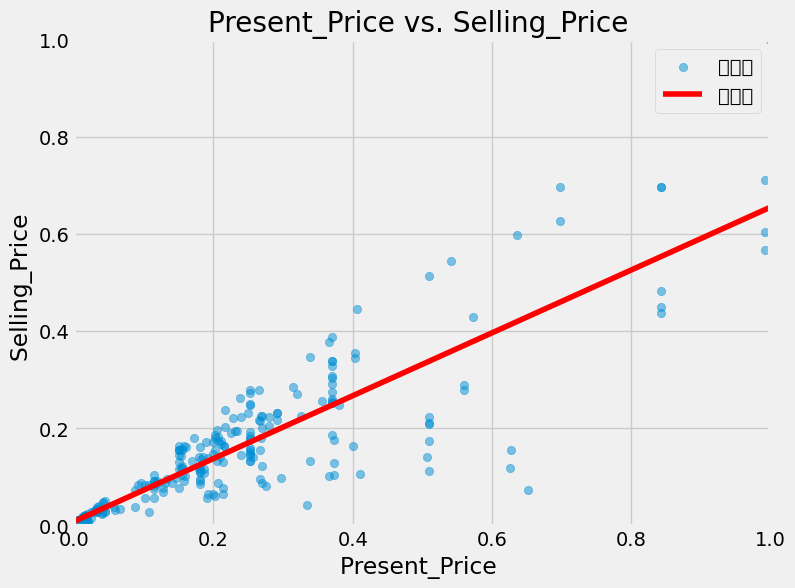

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  # 用于归一化

# 1. 读取数据
df = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际文件名修改

# 2. 选择所需列
columns_needed = ["Present_Price", "selling_price"]
df = df[columns_needed]

# 3. 去除 NaN 值
df = df.dropna(subset=columns_needed)

# 4. 去除 0 值
df = df[(df["Present_Price"] != 0) & (df["selling_price"] != 0)]

# 5. 归一化 (Min-Max Scaling)，但保持分布
scaler = MinMaxScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns_needed)

# 6. 进行线性回归
X = df_scaled[["Present_Price"]]  # 归一化后的 X
y = df_scaled["selling_price"]

model = LinearRegression()
model.fit(X, y)

# 7. 绘制散点图（归一化后）
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label="数据点")

# 8. 绘制回归直线
x_vals = np.linspace(0, 1, 100).reshape(-1, 1)  # 在0-1范围内生成等距点
y_pred = model.predict(x_vals)
plt.plot(x_vals, y_pred, color='red', label="回归线")

# 9. 设置归一化后的 X 和 Y 轴范围
plt.xlim(0, 1)
plt.ylim(0, 1)

# 10. 设置图表标题和标签
plt.xlabel("Present_Price ")
plt.ylabel("Selling_Price ")
plt.title("Present_Price vs. Selling_Price ")
plt.legend()
plt.grid(True)

# 11. 显示图像
plt.show()



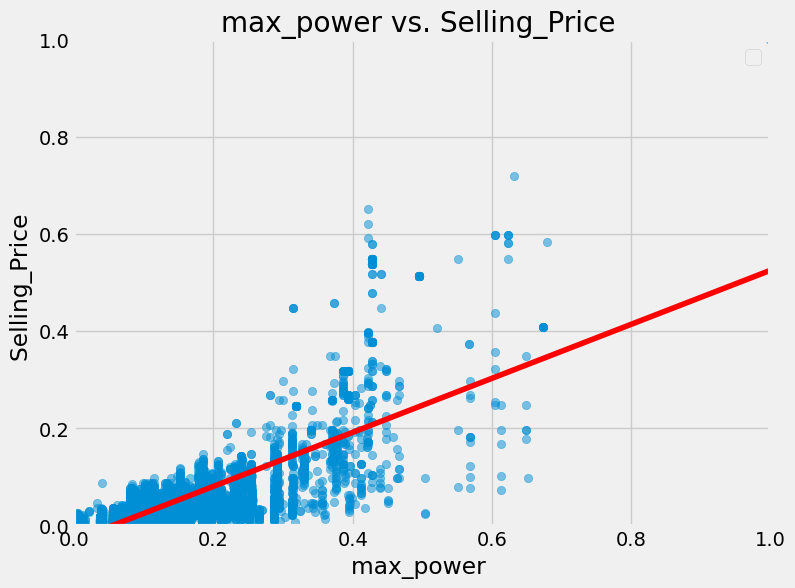

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  # 用于归一化

# 1. 读取数据
df = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际文件名修改

# 2. 选择所需列
columns_needed = ["max_power", "selling_price"]
df = df[columns_needed]

# 3. 去除 NaN 值
df = df.dropna(subset=columns_needed)

# 4. 去除 0 值
df = df[(df["max_power"] != 0) & (df["selling_price"] != 0)]

# 5. 归一化 (Min-Max Scaling)，但保持分布
scaler = MinMaxScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns_needed)

# 6. 进行线性回归
X = df_scaled[["max_power"]]  # 归一化后的 X
y = df_scaled["selling_price"]

model = LinearRegression()
model.fit(X, y)

# 7. 绘制散点图（归一化后）
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label="")

# 8. 绘制回归直线
x_vals = np.linspace(0, 1, 100).reshape(-1, 1)  # 在0-1范围内生成等距点
y_pred = model.predict(x_vals)
plt.plot(x_vals, y_pred, color='red', label="")

# 9. 设置归一化后的 X 和 Y 轴范围
plt.xlim(0, 1)
plt.ylim(0, 1)

# 10. 设置图表标题和标签
plt.xlabel("max_power ")
plt.ylabel("Selling_Price ")
plt.title("max_power vs. Selling_Price ")
plt.legend()
plt.grid(True)

# 11. 显示图像
plt.show()

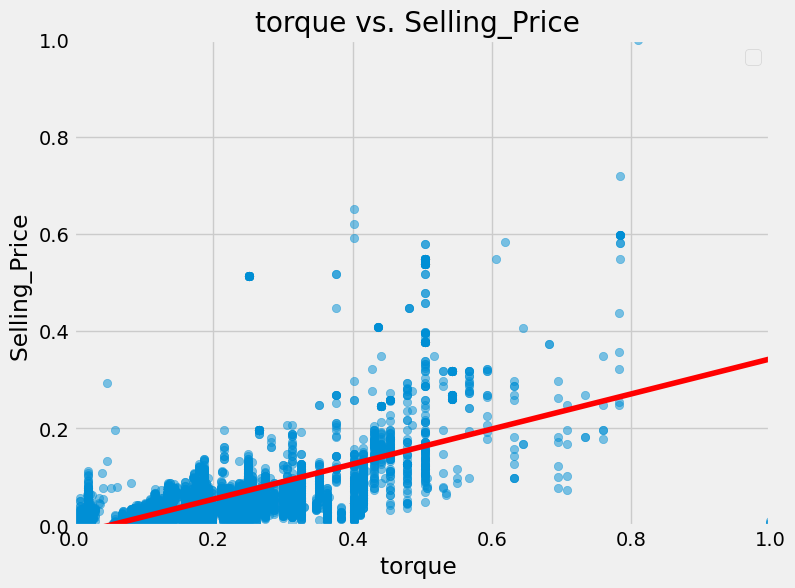

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  # 用于归一化

# 1. 读取数据
df = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际文件名修改

# 2. 选择所需列
columns_needed = ["torque", "selling_price"]
df = df[columns_needed]


# 3. 去除 NaN 值
df = df.dropna(subset=columns_needed)

# 4. 去除 0 值
df = df[(df["selling_price"] != 0)]

# 5. 归一化 (Min-Max Scaling)，但保持分布
scaler = MinMaxScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns_needed)

# 6. 进行线性回归
X = df_scaled[["torque"]]  # 归一化后的 X
y = df_scaled["selling_price"]

model = LinearRegression()
model.fit(X, y)

# 7. 绘制散点图（归一化后）
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label="")

# 8. 绘制回归直线
x_vals = np.linspace(0, 1, 100).reshape(-1, 1)  # 在0-1范围内生成等距点
y_pred = model.predict(x_vals)
plt.plot(x_vals, y_pred, color='red', label="")

# 9. 设置归一化后的 X 和 Y 轴范围
plt.xlim(0, 1)
plt.ylim(0, 1)

# 10. 设置图表标题和标签
plt.xlabel("torque ")
plt.ylabel("Selling_Price ")
plt.title("torque vs. Selling_Price ")
plt.legend()
plt.grid(True)

# 11. 显示图像
plt.show()

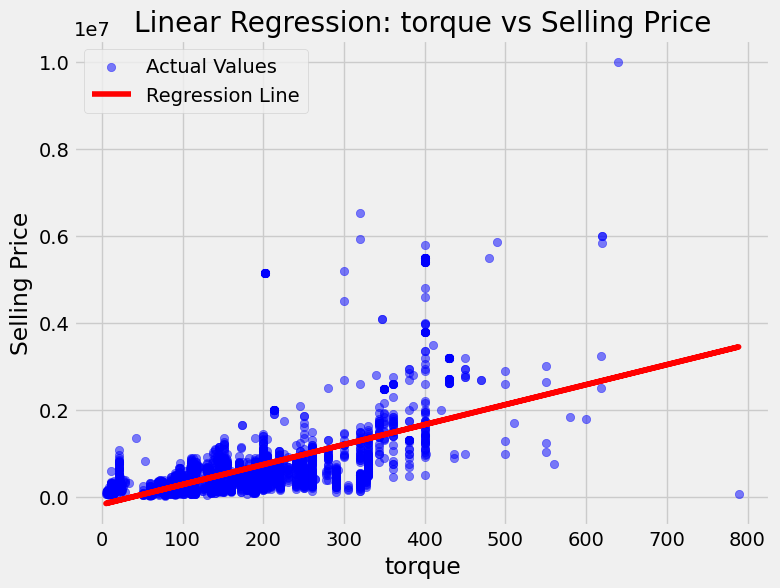

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 选择特征和目标变量
X = df[['torque']]  # 只使用 Pr,esent_Price 作为特征
y = df['selling_price']  # 目标变量

# 拆分数据集（60% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=42)

# 处理 NaN 数据（删除或填充）
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # 确保 y_train 同步
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# 5. 归一化 (Min-Max Scaling)，但保持分布
#scaler = MinMaxScaler()  
#df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns_needed)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 绘制散点图（实际值）
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)

# 绘制回归线（预测值）
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# 添加标题和标签
plt.title('Linear Regression: torque vs Selling Price')
plt.xlabel('torque')
plt.ylabel('Selling Price')
plt.legend()

# 显示图形
plt.show()

In [42]:
from sklearn.metrics import r2_score

# 计算 R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.36650647272759374


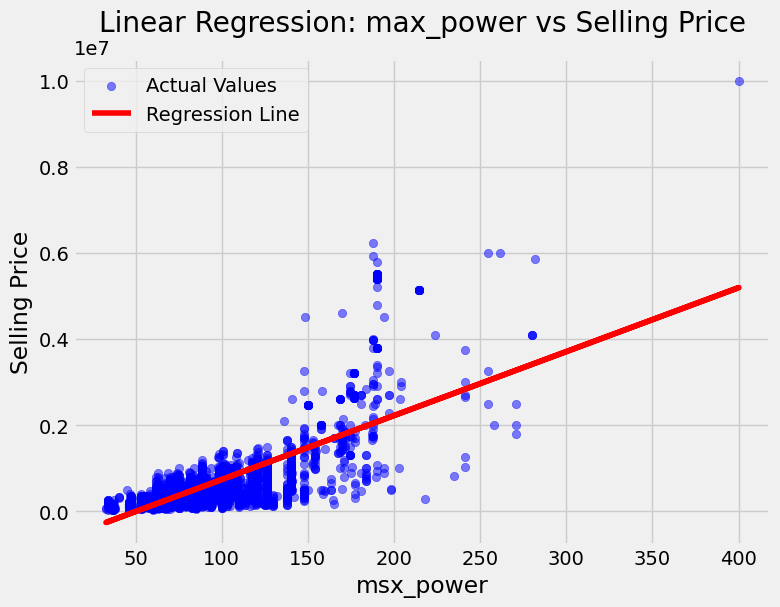

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 1. 读取数据
df2 = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际文件名修改

# 2. 选择所需列
columns_needed = ["max_power", "selling_price"]
df2 = df2[columns_needed]


# 3. 去除 NaN 值
df2 = df2.dropna(subset=columns_needed)

# 4. 去除 0 值
df2 = df2[(df2["max_power"] != 0)]
# 选择特征和目标变量
X = df2[['max_power']]  # 只使用 maxpower 作为特征
y = df2['selling_price']  # 目标变量

# 拆分数据集（60% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=42)

# 处理 NaN 数据（删除或填充）
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # 确保 y_train 同步
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 绘制散点图（实际值）
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)

# 绘制回归线（预测值）
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# 添加标题和标签
plt.title('Linear Regression: max_power vs Selling Price')
plt.xlabel('msx_power')
plt.ylabel('Selling Price')
plt.legend()

# 显示图形
plt.show()

In [44]:
from sklearn.metrics import r2_score

# 计算 R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.5357911442590076


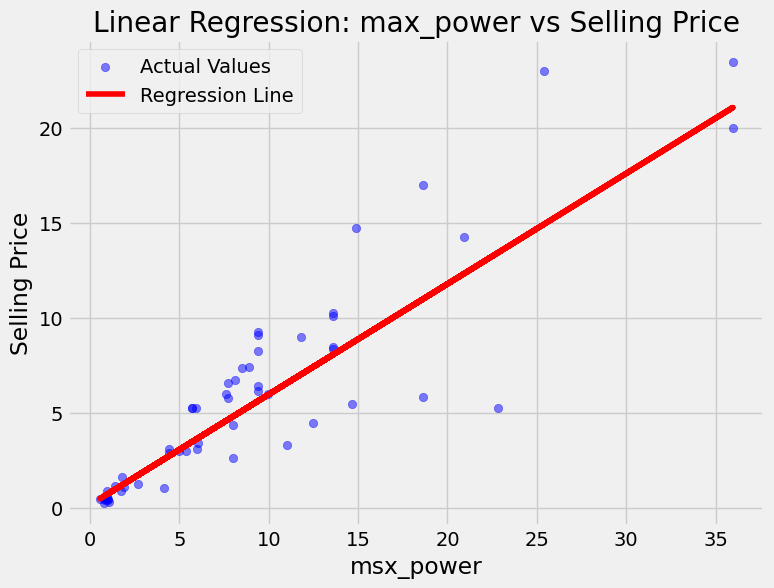

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 1. 读取数据
df3 = pd.read_csv("filtered_data_with_median.csv")  # 请根据实际文件名修改

# 2. 选择所需列
columns_needed = ["Present_Price", "selling_price"]
df3 = df3[columns_needed]

# 3. 去除 NaN 值
df3 = df3.dropna(subset=columns_needed)

# 4. 去除 0 值
df3 = df3[(df3["Present_Price"] != 0)]
# 选择特征和目标变量
X = df3[['Present_Price']]  # 只使用 maxpower 作为特征
y = df3['selling_price']  # 目标变量

# 拆分数据集（60% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# 处理 NaN 数据（删除或填充）
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # 确保 y_train 同步
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 绘制散点图（实际值）
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)

# 绘制回归线（预测值）
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# 添加标题和标签
plt.title('Linear Regression: max_power vs Selling Price')
plt.xlabel('msx_power')
plt.ylabel('Selling Price')
plt.legend()

# 显示图形
plt.show()

In [46]:
from sklearn.metrics import r2_score

# 计算 R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7908464891336298


mse

R² Score: 0.5810391087737109
Coefficients: [ 1.10932113e+03  1.24852157e+04 -2.24442023e+00]
Intercept: -561850.4956412802


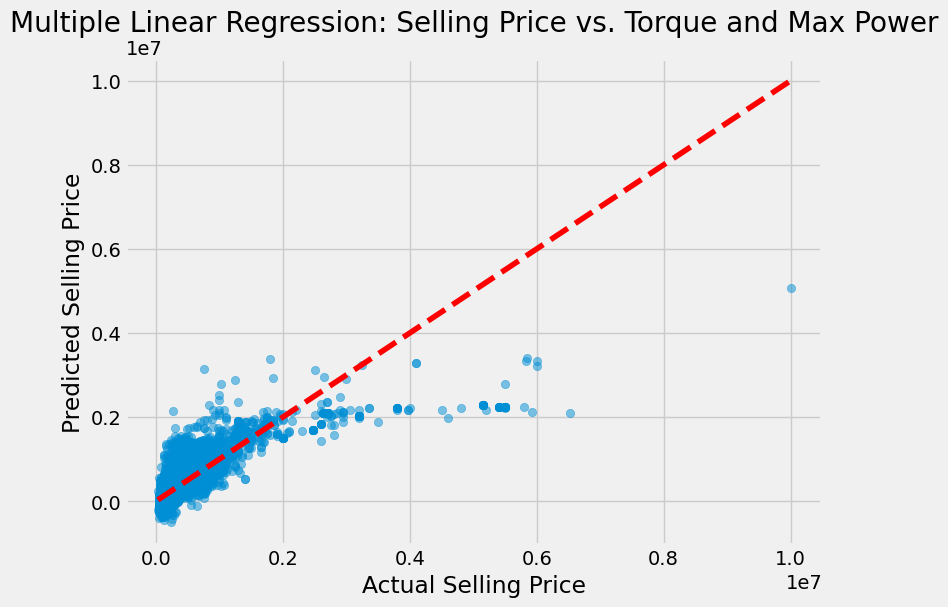

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 读取数据（假设文件名为 Car_details_v3.csv，确保该文件包含这三个特征）
df = pd.read_csv("filtered_data_with_median.csv")

# 2. 提取所需的特征，并删除缺失值
df_model = df[['selling_price', 'torque', 'max_power','km_driven']].dropna()

# 3. 定义自变量 X 和因变量 y
X = df_model[['torque', 'max_power','km_driven']]
y = df_model['selling_price']

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 5. 创建多元线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 6. 对测试集进行预测，并计算 R² 得分
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 7. 可视化预测结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Multiple Linear Regression: Selling Price vs. Torque and Max Power")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 理想预测线
plt.show()
